In [1]:
%load_ext autoreload
%autoreload 2
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [79]:
import numpy as np
import pandas as pd
from pathlib import Path
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import pprint

In [3]:
DATA_DIR = Path('../data/original/')

In [8]:
specs_df = pd.read_csv(DATA_DIR / 'specs.csv')
train_df = pd.read_csv(DATA_DIR / 'train.csv')
train_labels_df = pd.read_csv(DATA_DIR / 'train_labels.csv')
test_df = pd.read_csv(DATA_DIR / 'test.csv')

## specs

In [9]:
spces_df.head()

,event_id,info,args
0,2b9272f4,The end of system-initiated feedback (Correct)...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
1,df4fe8b6,The end of system-initiated feedback (Incorrec...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
2,3babcb9b,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
3,7f0836bf,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
4,ab3136ba,The end of system-initiated instruction event ...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."


In [25]:
specs_df.shape

(386, 3)

In [24]:
specs_df.describe()

,event_id,info,args
count,386,386,386
unique,386,168,191
top,db02c830,This event occurs when the player clicks on th...,"[{""name"":""game_time"",""type"":""int"",""info"":""mill..."
freq,1,17,25


In [7]:
specs_df['info'][0]

'The end of system-initiated feedback (Correct) event occurs when the game finishes delivering feedback to the player in response to a correct round attempt (pressing the go button with the correct answer). It contains information that describes the duration and content of the instruction, and will likely occur in conjunction with a beat round event. These events are used to determine the effectiveness of the feedback. We can answer questions like, "how much time elapsed while the game was presenting feedback?"'

In [14]:
json.loads(specs_df['args'][0])

[{'name': 'game_time',
  'type': 'int',
  'info': 'millisecond count since start of game'},
 {'name': 'round',
  'type': 'int',
  'info': 'number of the current round when the event takes place or 0 if no round'},
 {'name': 'level',
  'type': 'int',
  'info': 'number of the current level when the event takes place or 0 if no level'},
 {'name': 'description',
  'type': 'string',
  'info': 'the text or description of the instruction'},
 {'name': 'identifier',
  'type': 'string',
  'info': 'a unique identifier for this piece of instruction'},
 {'name': 'media_type',
  'type': 'string',
  'info': "the type of media that has just played:\n'audio' || 'animation' || 'other'"},
 {'name': 'duration',
  'type': 'int',
  'info': 'the duration of the media playback in milliseconds'},
 {'name': 'event_count', 'type': 'int', 'info': 'session event counter'},
 {'name': 'event_code', 'type': 'int', 'info': 'event class identifier'}]

In [15]:
specs_df['info'][3]

'The end of system-initiated instruction event occurs when the game finishes delivering instructions to the player. It contains information that describes the content of the instruction including duration. These events are used to determine the effectiveness of the instructions and the amount of time they consume. We can answer questions like "how much time elapsed while the game was presenting instruction?"'

In [16]:
json.loads(specs_df['args'][3])

[{'name': 'game_time',
  'type': 'int',
  'info': 'millisecond count since start of game'},
 {'name': 'round',
  'type': 'int',
  'info': 'number of the current round when the event takes place or 0 if no round'},
 {'name': 'description',
  'type': 'string',
  'info': 'the text or description of the instruction'},
 {'name': 'identifier',
  'type': 'string',
  'info': 'a unique identifier for this piece of instruction'},
 {'name': 'media_type',
  'type': 'string',
  'info': "the type of media that has just played:\n'audio' || 'animation' || 'other'"},
 {'name': 'duration',
  'type': 'int',
  'info': 'the duration of the media playback in milliseconds'},
 {'name': 'event_count', 'type': 'int', 'info': 'session event counter'},
 {'name': 'event_code', 'type': 'int', 'info': 'event class identifier'}]

## train

In [17]:
train_df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,45bb1e1b6b50c07b,2019-09-06T17:53:46.937Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,17eeb7f223665f53,2019-09-06T17:54:17.519Z,"{""event_code"": 2000, ""event_count"": 1}",0001e90f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK


In [26]:
train_df.shape

(11341042, 11)

In [27]:
train_df.describe()

,event_count,event_code,game_time
count,1.134104e+07,1.134104e+07,1.134104e+07
mean,1.056642e+02,3.513838e+03,1.976236e+05
std,1.483477e+02,6.816470e+02,1.803968e+06
min,1.000000e+00,2.000000e+03,0.000000e+00
25%,2.500000e+01,3.021000e+03,3.061800e+04
50%,6.100000e+01,4.020000e+03,7.276100e+04
75%,1.290000e+02,4.035000e+03,1.574460e+05
max,3.368000e+03,5.010000e+03,3.069102e+08


In [32]:
train_df.event_id.nunique()

384

In [35]:
train_df.game_session.nunique()

303319

In [37]:
train_df.timestamp.min()
train_df.timestamp.max()

'2019-07-23T02:12:17.279Z'

'2019-10-22T17:41:45.983Z'

In [33]:
train_df.installation_id.nunique()

17000

In [34]:
train_df.event_count.nunique()

3368

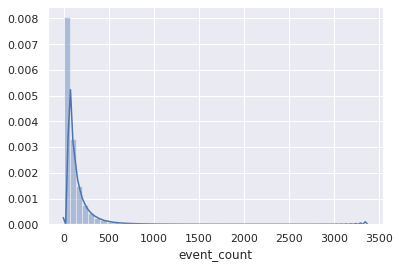

In [41]:
sns.distplot(train_df.event_count, )

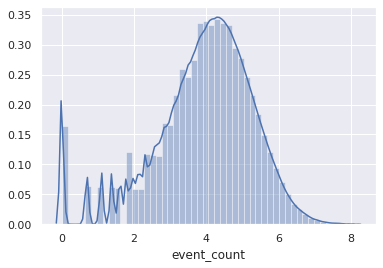

In [40]:
sns.distplot(np.log(train_df.event_count))

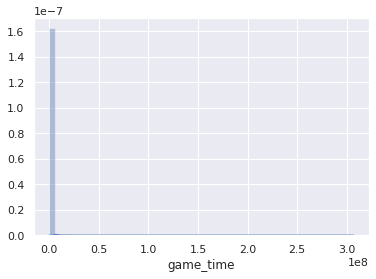

In [42]:
sns.distplot(train_df.game_time)

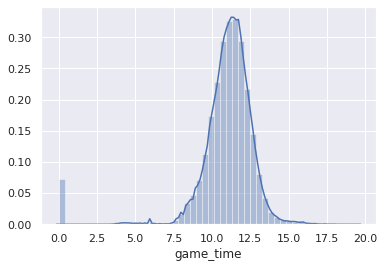

In [44]:
sns.distplot(np.log1p(train_df.game_time))

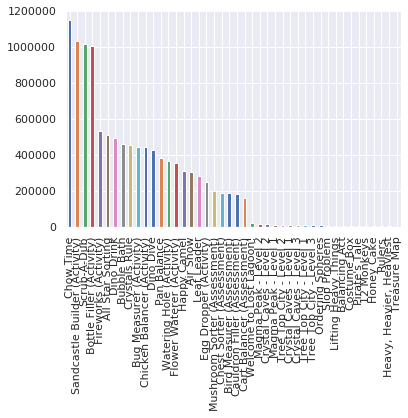

In [50]:
train_df.title.value_counts().plot(kind='bar')

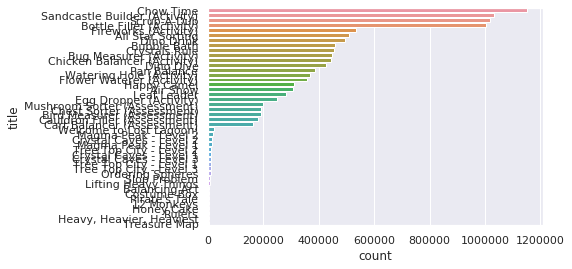

In [49]:
sns.countplot(y='title', data=train_df, order=train_df.title.value_counts().index)

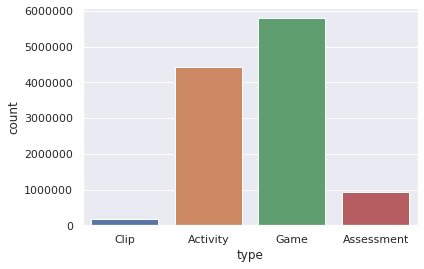

In [51]:
sns.countplot(x='type', data=train_df)

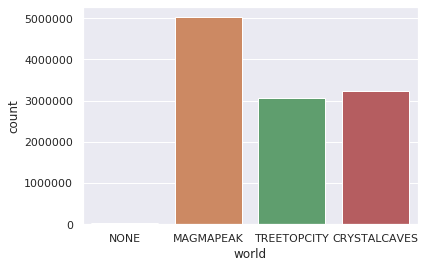

In [52]:
sns.countplot(x='world', data=train_df)

In [59]:
train_df.groupby(['title', 'type', 'world'])['event_id'].count().sort_values(ascending=False)

title                          type        world       
Chow Time                      Game        CRYSTALCAVES    1150974
Sandcastle Builder (Activity)  Activity    MAGMAPEAK       1034332
Scrub-A-Dub                    Game        MAGMAPEAK       1016837
Bottle Filler (Activity)       Activity    MAGMAPEAK       1004068
Fireworks (Activity)           Activity    TREETOPCITY      535030
All Star Sorting               Game        TREETOPCITY      509344
Dino Drink                     Game        MAGMAPEAK        492916
Bubble Bath                    Game        MAGMAPEAK        458972
Crystals Rule                  Game        TREETOPCITY      453852
Bug Measurer (Activity)        Activity    TREETOPCITY      446430
Chicken Balancer (Activity)    Activity    CRYSTALCAVES     443156
Dino Dive                      Game        MAGMAPEAK        427655
Pan Balance                    Game        CRYSTALCAVES     384857
Watering Hole (Activity)       Activity    MAGMAPEAK        369270
Flower

In [93]:
train_df.query('game_session=="901acc108f55a5a1" & event_code==4100')

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
2228,25fa8af4,901acc108f55a5a1,2019-08-06T05:22:32.357Z,"{""correct"":true,""stumps"":[1,2,4],""event_count""...",0006a69f,44,4100,31011,Mushroom Sorter (Assessment),Assessment,TREETOPCITY


In [62]:
train_df.query('game_session == "0848ef14a8dc6892"')

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
2,77261ab5,0848ef14a8dc6892,2019-09-06T17:54:56.302Z,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0001e90f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK
3,b2dba42b,0848ef14a8dc6892,2019-09-06T17:54:56.387Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,2,3010,53,Sandcastle Builder (Activity),Activity,MAGMAPEAK
4,1bb5fbdb,0848ef14a8dc6892,2019-09-06T17:55:03.253Z,"{""description"":""Let's build a sandcastle! Firs...",0001e90f,3,3110,6972,Sandcastle Builder (Activity),Activity,MAGMAPEAK
5,1325467d,0848ef14a8dc6892,2019-09-06T17:55:06.279Z,"{""coordinates"":{""x"":583,""y"":605,""stage_width"":...",0001e90f,4,4070,9991,Sandcastle Builder (Activity),Activity,MAGMAPEAK
6,1325467d,0848ef14a8dc6892,2019-09-06T17:55:06.913Z,"{""coordinates"":{""x"":601,""y"":570,""stage_width"":...",0001e90f,5,4070,10622,Sandcastle Builder (Activity),Activity,MAGMAPEAK
7,1325467d,0848ef14a8dc6892,2019-09-06T17:55:07.546Z,"{""coordinates"":{""x"":250,""y"":665,""stage_width"":...",0001e90f,6,4070,11255,Sandcastle Builder (Activity),Activity,MAGMAPEAK
8,1325467d,0848ef14a8dc6892,2019-09-06T17:55:07.979Z,"{""coordinates"":{""x"":279,""y"":629,""stage_width"":...",0001e90f,7,4070,11689,Sandcastle Builder (Activity),Activity,MAGMAPEAK
9,1325467d,0848ef14a8dc6892,2019-09-06T17:55:08.566Z,"{""coordinates"":{""x"":839,""y"":654,""stage_width"":...",0001e90f,8,4070,12272,Sandcastle Builder (Activity),Activity,MAGMAPEAK
10,1325467d,0848ef14a8dc6892,2019-09-06T17:55:08.966Z,"{""coordinates"":{""x"":807,""y"":619,""stage_width"":...",0001e90f,9,4070,12672,Sandcastle Builder (Activity),Activity,MAGMAPEAK
11,1325467d,0848ef14a8dc6892,2019-09-06T17:55:09.673Z,"{""coordinates"":{""x"":810,""y"":611,""stage_width"":...",0001e90f,10,4070,13389,Sandcastle Builder (Activity),Activity,MAGMAPEAK


## train labels


In [18]:
train_labels_df.head()

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group
0,6bdf9623adc94d89,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
1,77b8ee947eb84b4e,0006a69f,Bird Measurer (Assessment),0,11,0.0,0
2,901acc108f55a5a1,0006a69f,Mushroom Sorter (Assessment),1,0,1.0,3
3,9501794defd84e4d,0006a69f,Mushroom Sorter (Assessment),1,1,0.5,2
4,a9ef3ecb3d1acc6a,0006a69f,Bird Measurer (Assessment),1,0,1.0,3


In [66]:
train_labels_df.shape

(17690, 7)

In [65]:
train_labels_df.game_session.nunique()

17690

In [67]:
train_labels_df.installation_id.nunique()

3614

In [63]:
train_labels_df.query('game_session == "0848ef14a8dc6892"')

,game_session,installation_id,title,num_correct,num_incorrect,accuracy,accuracy_group


## test

In [19]:
test_df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
0,27253bdc,0ea9ecc81a565215,2019-09-10T16:50:24.910Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE
1,27253bdc,c1ea43d8b8261d27,2019-09-10T16:50:55.503Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK
2,27253bdc,7ed86c6b72e725e2,2019-09-10T16:51:51.805Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Magma Peak - Level 2,Clip,MAGMAPEAK
3,27253bdc,7e516ace50e7fe67,2019-09-10T16:53:12.825Z,"{""event_code"": 2000, ""event_count"": 1}",00abaee7,1,2000,0,Crystal Caves - Level 1,Clip,CRYSTALCAVES
4,7d093bf9,a022c3f60ba547e7,2019-09-10T16:54:12.115Z,"{""version"":""1.0"",""round"":0,""event_count"":1,""ga...",00abaee7,1,2000,0,Chow Time,Game,CRYSTALCAVES


In [23]:
test_df.shape

(1156414, 11)

In [68]:
test_df.event_id.nunique()

365

In [69]:
test_df.game_session.nunique()

28445

In [73]:
test_df.installation_id.nunique()

1000

In [83]:
test_df.title.unique()

array(['Welcome to Lost Lagoon!', 'Magma Peak - Level 1',
       'Magma Peak - Level 2', 'Crystal Caves - Level 1', 'Chow Time',
       'Balancing Act', 'Crystal Caves - Level 2',
       'Tree Top City - Level 1', 'All Star Sorting', 'Costume Box',
       'Fireworks (Activity)', '12 Monkeys', 'Lifting Heavy Things',
       'Cart Balancer (Assessment)', 'Crystal Caves - Level 3',
       'Egg Dropper (Activity)', 'Bug Measurer (Activity)',
       'Sandcastle Builder (Activity)', 'Dino Dive',
       'Cauldron Filler (Assessment)', 'Scrub-A-Dub',
       'Watering Hole (Activity)', 'Dino Drink', 'Bubble Bath',
       'Bottle Filler (Activity)', 'Chicken Balancer (Activity)',
       'Honey Cake', 'Happy Camel', 'Leaf Leader',
       'Heavy, Heavier, Heaviest', 'Pan Balance',
       'Chest Sorter (Assessment)', 'Ordering Spheres',
       'Tree Top City - Level 2', 'Flower Waterer (Activity)',
       "Pirate's Tale", 'Mushroom Sorter (Assessment)', 'Air Show',
       'Treasure Map', 'Tree Top 

In [90]:
len(test_df.query('~(title=="Bird Measurer (Assessment)") & event_code==4100'))

7020

In [87]:
len(test_df.query('title=="Bird Measurer (Assessment)" & event_code==4110'))

1103

In [76]:
test_df.query('installation_id == "00abaee7" & event_code==4100')

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world
303,d122731b,8b38fc0d2fd315dc,2019-09-11T18:56:34.661Z,"{""correct"":true,""left"":[{""id"":""gem07"",""weight""...",00abaee7,22,4100,22737,Cart Balancer (Assessment),Assessment,CRYSTALCAVES


## sample submission

In [20]:
sample_submission = pd.read_csv(DATA_DIR / 'sample_submission.csv')

In [21]:
sample_submission.head()

,installation_id,accuracy_group
0,00abaee7,3
1,01242218,3
2,017c5718,3
3,01a44906,3
4,01bc6cb6,3


In [22]:
sample_submission.shape

(1000, 2)